In [3]:
import os
import numpy as np

In [9]:
def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

#### Load Pro Runner Embeddings

In [6]:
pro_runners = {}
for file in os.listdir('../data/embed/Pro_Runners/'):
    if file.endswith('.npy'):
        embed = np.load('../data/embed/Pro_Runners/'+file) # (Time, Joint, Dim)
        embed = embed.reshape(embed.shape[0], -1) # (Time, Joint*Dim)
        embed = np.mean(embed, axis=0) # (Joint*Dim)
        pro_runners[file.split('.')[0]] = embed

#### Load Oliver Embedding

In [18]:
embed = np.load('../data/embed/oliver/IMG_5040.npy') # (Time, Joint, Dim)
embed = embed.reshape(embed.shape[0], -1) # (Time, Joint*Dim)
oliver_embed = np.mean(embed, axis=0) # (Joint*Dim)

#### Similarity between Pro Runner and Oliver

In [19]:
pro_runner_similarity = {}
for name, embed in pro_runners.items():
    pro_runner_similarity[name.replace('_', ' ')] = cosine_similarity(oliver_embed, embed)

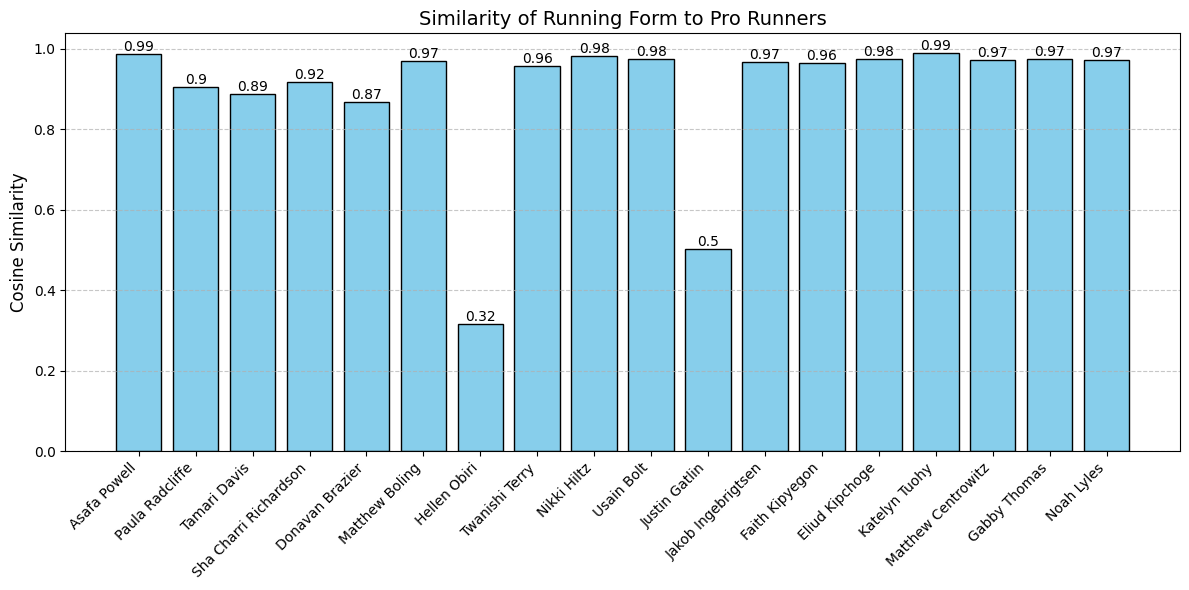

In [20]:
# Plot a bar chart with the similarities
import matplotlib.pyplot as plt
# Improved bar chart
plt.figure(figsize=(12, 6))

# Using a more appealing color and adding edge color for professionalism
bars = plt.bar(pro_runner_similarity.keys(), pro_runner_similarity.values(), color='skyblue', edgecolor='black')

# Adding value labels on top of each bar for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

# Improving the appearance of the axes and labels
plt.xticks(rotation=45, ha='right')
plt.ylabel('Cosine Similarity', fontsize=12)
plt.title('Similarity of Running Form to Pro Runners', fontsize=14)

# Adding a grid for easier reading of values
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()